In [1]:
!pip install pyreadr

     |████████████████████████████████| 419kB 4.1MB/s 


In [2]:
import pandas as pd
from sklearn.neighbors import KernelDensity
import numpy as np
import pyreadr
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
#define the function for kernal density estimation

def kde2D(x, y, bandwidth, xbins=50j, ybins=25j, **kwargs): 
    """Build 2D kernel density estimate (KDE)."""

    # create grid of sample locations (default: 50*25) this is for plotting 
    xx, yy = np.mgrid[x.min():x.max():xbins, 
                      y.min():y.max():ybins]

    xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T
    xy_train  = np.vstack([y, x]).T

    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(xy_train)

    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde_skl.score_samples(xy_sample))
    return xx, yy, np.reshape(z, xx.shape)

In [15]:
result = pyreadr.read_r('/content/Laplanada_soiltypes.rds') # also works for RData
df = result[None]# extract the pandas data frame 

In [16]:
df

,sp,gx,gy,soiltype
0,CARAGU,0.85,3.81,NaN
1,INGARU,8.84,4.67,1.0
2,HYEROB,5.67,4.79,1.0
3,OCOTFL,12.92,3.66,1.0
4,MICOLA,16.29,4.38,2.0
...,...,...,...,...
15015,CYATCA,483.49,249.32,1.0
15016,CYATCA,494.69,359.86,1.0
15017,CYATCA,498.37,383.38,1.0
15018,TRIC01,490.96,453.62,1.0


In [32]:
def kde_save(df,soiltype):
  dt_c = df[df['soiltype']==soiltype]
  x, y = dt_c["gx"], dt_c["gy"]
  xx, yy, zz = kde2D(x, y, 20.0,xbins=25j, ybins=25j)
  plt.pcolormesh(xx, yy, zz)
  np.savetxt("Lap_soil"+str(int(soiltype))+".csv", zz, delimiter=",")


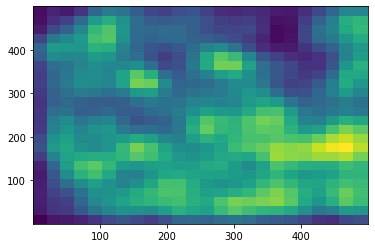

In [33]:
kde_save(df,1.0)

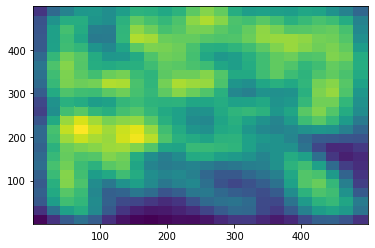

In [36]:
kde_save(df,2.0)